In [7]:
#This program generates the rate trace in Fig. 2A and Fig. 2B
#For the spontanous case and FF state.

In [8]:
#Import some libraries 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Importing some info I need 
#Number of neurons for each type in each of the 4 layers
N= (np.loadtxt("../general_files/N.txt").reshape(4, 4)).astype(int)
Ntot=5000
#In layer 1: 
N1=int(0.0192574218*Ntot)
#print(N1)

print("The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1")
print("Total number of neurons in the column: %s + %s \n85 perc excitatory and 15 perc inhibitory \nIn each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   "%(Ntot,N1))
print("Number of neurons for each type in each of the 4 layers:")
print(N)
print("The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6")


The corticular column in this model is composed by layer 2/3,4,5,6 and layer 1
Total number of neurons in the column: 5000 + 96 
85 perc excitatory and 15 perc inhibitory 
In each layer: 1 excitotory population and 3 inhibitory populations: pv, sst and vip cells.   
Number of neurons for each type in each of the 4 layers:
[[1236   65   47  107]
 [1010   98   53   27]
 [ 741   63   56   11]
 [1263  102  102   19]]
The order is from left to right: E, PV, SST, VIP. From top to bottom: 2/3,4,5,6


In [72]:
#File containing the spike data
#a='../simulations_data/In_spontaneuous/Timing/i1/Sp_1' #Spontanous
#a='../simulations_data/In_with_e4/Timing/i1/Sp_1' #FF case

#a='../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e6'
#a='../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e6'


#a='../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e23'
#a='../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23'


#a='../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e5'

a='../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e5'



#Upload the spikes files, I upload the data from all layers (In case you want to plot it later)
#layer1
S_vip1i=np.array(np.loadtxt(a+'/S_vip1i.txt') )
S_vip1t=np.array(np.loadtxt(a+'/S_vip1t.txt') )*1000

#layer23
S_e23i=np.array(np.loadtxt(a+'/S_e23i.txt') )
S_e23t=np.array(np.loadtxt(a+'/S_e23t.txt') )*1000

S_pv23i=np.array(np.loadtxt(a+'/S_pv23i.txt') )
S_pv23t=np.array(np.loadtxt(a+'/S_pv23t.txt') )*1000

S_sst23i=np.array(np.loadtxt(a+'/S_sst23i.txt') )
S_sst23t=np.array(np.loadtxt(a+'/S_sst23t.txt') )*1000

S_vip23i=np.array(np.loadtxt(a+'/S_vip23i.txt') )
S_vip23t=np.array(np.loadtxt(a+'/S_vip23t.txt') )*1000

#layer4
S_e4i=np.array(np.loadtxt(a+'/S_e4i.txt') )
S_e4t=np.array(np.loadtxt(a+'/S_e4t.txt') )*1000

S_pv4i=np.array(np.loadtxt(a+'/S_pv4i.txt') )
S_pv4t=np.array(np.loadtxt(a+'/S_pv4t.txt') )*1000

S_sst4i=np.array(np.loadtxt(a+'/S_sst4i.txt') )
S_sst4t=np.array(np.loadtxt(a+'/S_sst4t.txt') )*1000

S_vip4i=np.array(np.loadtxt(a+'/S_vip4i.txt') )
S_vip4t=np.array(np.loadtxt(a+'/S_vip4t.txt') )*1000

#layer5
S_e5i=np.array(np.loadtxt(a+'/S_e5i.txt') )
S_e5t=np.array(np.loadtxt(a+'/S_e5t.txt') )*1000

S_pv5i=np.array(np.loadtxt(a+'/S_pv5i.txt') )
S_pv5t=np.array(np.loadtxt(a+'/S_pv5t.txt') )*1000

S_sst5i=np.array(np.loadtxt(a+'/S_sst5i.txt') )
S_sst5t=np.array(np.loadtxt(a+'/S_sst5t.txt') )*1000

S_vip5i=np.array(np.loadtxt(a+'/S_vip5i.txt') )
S_vip5t=np.array(np.loadtxt(a+'/S_vip5t.txt') )*1000

#layer6
S_e6i=np.array(np.loadtxt(a+'/S_e6i.txt') )
S_e6t=np.array(np.loadtxt(a+'/S_e6t.txt') )*1000

S_pv6i=np.array(np.loadtxt(a+'/S_pv6i.txt') )
S_pv6t=np.array(np.loadtxt(a+'/S_pv6t.txt') )*1000

S_sst6i=np.array(np.loadtxt(a+'/S_sst6i.txt') )
S_sst6t=np.array(np.loadtxt(a+'/S_sst6t.txt') )*1000

S_vip6i=np.array(np.loadtxt(a+'/S_vip6i.txt') )
S_vip6t=np.array(np.loadtxt(a+'/S_vip6t.txt') )*1000

In [73]:
#Funciton to compute the rate from the spike data 
def rates(data,iniz,fin,window,step_size):
    spikes=0
    time=iniz*1000
    all_time=fin*1000
    rates=[]
    sort_data=np.sort(data)

    while time <= all_time-window:
        for i in range(0,len(data)):
                if time <sort_data[i]< time+window:
                    spikes+=1
                elif sort_data[i]>= time+window:
                    break
        rates.append((spikes/window)*1000)
        time+=step_size
        spikes=0
    return rates 

In [74]:
#Parameters to compute the rates
iniz=0
fin=3
window=200
step=0.1
step=1

# #Compute the rates of PV in layer 5 
# r_pv5=rates(S_pv5t,iniz,fin,window,step)
# # r_e5=rates(S_e5t,iniz,fin,window,step)
# # r_vip5=rates(S_vip5t,iniz,fin,window,step)



#r_e4=rates(S_e4t,iniz,fin,window,step)


#r_pv6=rates(S_pv6t,iniz,fin,window,step)


r_sst23=rates(S_sst23t,iniz,fin,window,step)


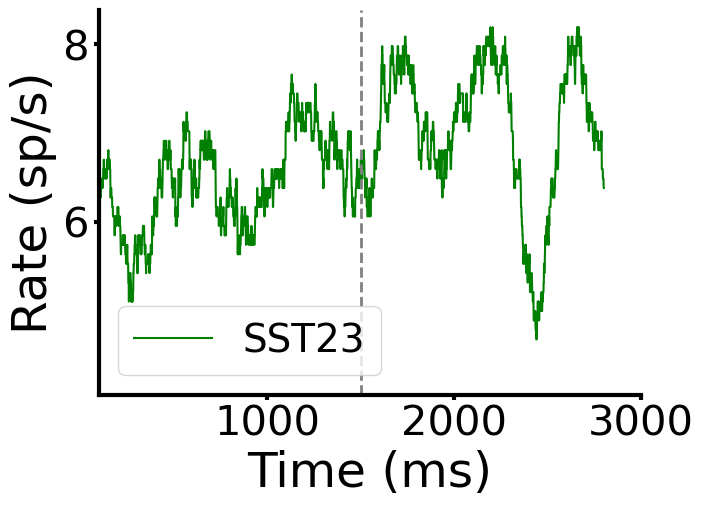

In [75]:
#Rate plot 
fig , ax = plt.subplots(figsize=(7,5))

#plt.plot(r_pv5/N[2][1],color='blue', label='Rate\nPV 5')
#plt.plot(r_e5,color='crimson', label='e') #If you also want to plot other groups
# plt.plot(r_sst5,color='green', label='s')
# plt.plot(r_vip5,color='orange', label='v')

#plt.plot(r_e4/N[1][0],color='crimson', label='E4') #If you also want to plot other groups

#plt.plot(r_pv6/N[3][1],color='blue', label='PV6') #If you also want to plot other groups


plt.plot(r_sst23/N[0][2],color='green', label='SST23') #If you also want to plot other groups



#Layout of the plot
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)

#Labels and size 
plt.xlabel('Time (ms)',size=35)
plt.ylabel('Rate (sp/s)',size=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=30)

plt.legend(loc='best',fontsize=28)

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=5)
plt.xlim(100,3000)
#plt.ylim(0,11) #For Spontanous case
#plt.ylim(0,22) #For FF case

#vertical line at stimulus onset
plt.axvline(x=1500, color='grey', linestyle='--', linewidth=2)

#Save figure
#Fig. 2A:
#plt.savefig('../IMAGES/fig2_rate_pv5_spont.png',bbox_inches='tight') 
#Fig. 2B:
#plt.savefig('../IMAGES/fig2_rate_pv5_FF.png',bbox_inches='tight')



#plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_e4_FF.png',bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_e4_spont.png',bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_pv6_spont.png',bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_pv6_ff.png',bbox_inches='tight')



#plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_sst23_spont.png',bbox_inches='tight')
plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_sst23_FF.png',bbox_inches='tight')



plt.show()

In [56]:
import numpy as np

# Your existing rates function
def rates(data, iniz, fin, window, step_size):
    spikes = 0
    time = iniz * 1000
    all_time = fin * 1000
    rates = []
    sort_data = np.sort(data)

    while time <= all_time - window:
        for i in range(0, len(data)):
            if time < sort_data[i] < time + window:
                spikes += 1
            elif sort_data[i] >= time + window:
                break
        rates.append((spikes / window) * 1000)  # Firing rate in spikes/s
        time += step_size
        spikes = 0
    return rates

# Example function to load the spike data for different simulation conditions
def load_spike_data(a):
    # Assuming you're loading the same set of data as above
    S_pv6t = np.array(np.loadtxt(a + '/S_pv6t.txt')) * 1000  # Load and convert to ms
    return S_pv6t

# List of different simulation folders
simulation_folders = [
    '../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23_1',
    '../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23_2',
    '../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23_3',
    '../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23_4',
    '../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23_5',
    '../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23_6',
    '../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23_7',
    '../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23_8',
    '../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23_9',
    '../simulations_data/REVISIONS_1/TIMING_e4_0pA_e5_0pA_e23_0pA_e6_0pA/e23_10'
]

# Set parameters
iniz=0
fin=3
window=200
step=0.1
step=1

# Compute firing rates for multiple simulations and take the mean across traces
all_rates_pv6 = []

for folder in simulation_folders:
    # Load spike data for the current simulation
    S_pv6t = load_spike_data(folder)
    
    # Compute firing rates for PV6 cells
    r_pv6 = rates(S_pv6t, iniz, fin, window, step)
    
    # Append the result to the list
    all_rates_pv6.append(r_pv6)

# Compute the mean firing rates across simulations (averaging the traces)
mean_r_pv6 = np.mean(all_rates_pv6, axis=0)

# Now `mean_r_pv6` contains the average firing rates across all simulations
print(mean_r_pv6)


[357.5 361.  363.5 ... 636.5 636.5 636. ]


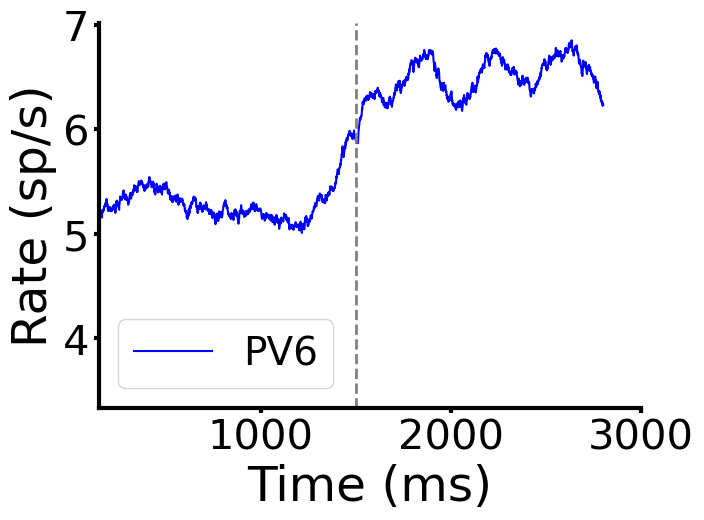

In [76]:
#Rate plot 
fig , ax = plt.subplots(figsize=(7,5))

#plt.plot(r_pv5/N[2][1],color='blue', label='Rate\nPV 5')
#plt.plot(r_e5,color='crimson', label='e') #If you also want to plot other groups
# plt.plot(r_sst5,color='green', label='s')
# plt.plot(r_vip5,color='orange', label='v')

#plt.plot(r_e4,color='crimson', label='E4') #If you also want to plot other groups

plt.plot(mean_r_pv6/N[3][1],color='blue', label='PV6') #If you also want to plot other groups


#Layout of the plot
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)

#Labels and size 
plt.xlabel('Time (ms)',size=35)
plt.ylabel('Rate (sp/s)',size=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=30)

plt.legend(loc='lower left',fontsize=28)

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=5)
plt.xlim(150,3000)
#plt.ylim(0,11) #For Spontanous case
#plt.ylim(0,22) #For FF case

#vertical line at stimulus onset
plt.axvline(x=1500, color='grey', linestyle='--', linewidth=2)

#Save figure
#Fig. 2A:
#plt.savefig('../IMAGES/fig2_rate_pv5_spont.png',bbox_inches='tight') 
#Fig. 2B:
#plt.savefig('../IMAGES/fig2_rate_pv5_FF.png',bbox_inches='tight')



#plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_e4_FF.png',bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_e4_spont.png',bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_pv6_spont.png',bbox_inches='tight')

plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_pv6_spont_MEAN.png',bbox_inches='tight')


plt.show()

In [52]:
import numpy as np

# Your existing rates function
def rates(data, iniz, fin, window, step_size):
    spikes = 0
    time = iniz * 1000
    all_time = fin * 1000
    rates = []
    sort_data = np.sort(data)

    while time <= all_time - window:
        for i in range(0, len(data)):
            if time < sort_data[i] < time + window:
                spikes += 1
            elif sort_data[i] >= time + window:
                break
        rates.append((spikes / window) * 1000)  # Firing rate in spikes/s
        time += step_size
        spikes = 0
    return rates

# Example function to load the spike data for different simulation conditions
def load_spike_data(a):
    # Assuming you're loading the same set of data as above
    S_pv6t = np.array(np.loadtxt(a + '/S_pv6t.txt')) * 1000  # Load and convert to ms
    return S_pv6t

# List of different simulation folders
simulation_folders = [
    '../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e23_1',
    '../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e23_2',
    '../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e23_3',
    '../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e23_4',
    '../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e23_5',
    '../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e23_6',
    '../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e23_7',
    '../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e23_8',
    '../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e23_9',
    '../simulations_data/REVISIONS_1/TIMING_e4_150pA_e5_0pA_e23_0pA_e6_0pA/e23_10'
]

# Set parameters
iniz=0
fin=3
window=200
step=0.1
step=1

# Compute firing rates for multiple simulations and take the mean across traces
all_rates_pv6 = []

for folder in simulation_folders:
    # Load spike data for the current simulation
    S_pv6t = load_spike_data(folder)
    
    # Compute firing rates for PV6 cells
    r_pv6 = rates(S_pv6t, iniz, fin, window, step)
    
    # Append the result to the list
    all_rates_pv6.append(r_pv6)

# Compute the mean firing rates across simulations (averaging the traces)
mean_r_pv6 = np.mean(all_rates_pv6, axis=0)

# Now `mean_r_pv6` contains the average firing rates across all simulations
print(mean_r_pv6)


[ 660.5  665.5  668.5 ... 1146.  1145.  1145.5]


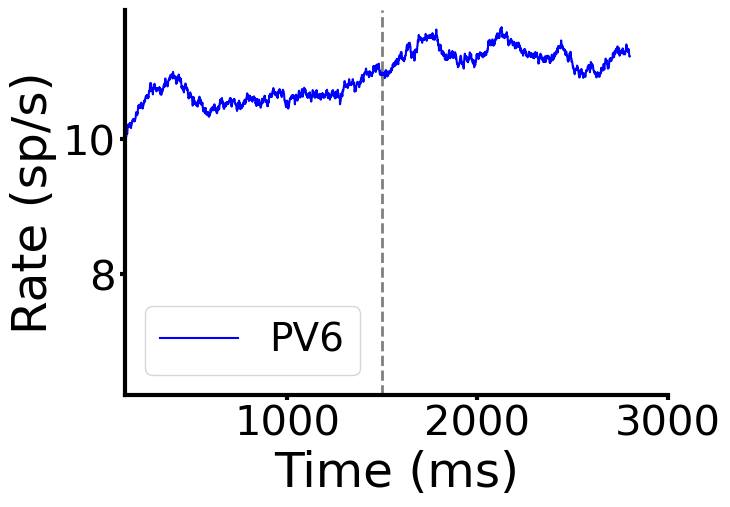

In [55]:
#Rate plot 
fig , ax = plt.subplots(figsize=(7,5))

#plt.plot(r_pv5/N[2][1],color='blue', label='Rate\nPV 5')
#plt.plot(r_e5,color='crimson', label='e') #If you also want to plot other groups
# plt.plot(r_sst5,color='green', label='s')
# plt.plot(r_vip5,color='orange', label='v')

#plt.plot(r_e4,color='crimson', label='E4') #If you also want to plot other groups

plt.plot(mean_r_pv6/N[3][1],color='blue', label='PV6') #If you also want to plot other groups


#Layout of the plot
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.setp(ax.spines.values(), linewidth=3)

#Labels and size 
plt.xlabel('Time (ms)',size=35)
plt.ylabel('Rate (sp/s)',size=35)
ax.xaxis.set_tick_params(width=3)
ax.yaxis.set_tick_params(width=3)
ax.tick_params(axis="x", labelsize=30)
ax.tick_params(axis="y", labelsize=30)

plt.legend(loc='best',fontsize=28)

plt.locator_params(axis='y', nbins=4)
plt.locator_params(axis='x', nbins=5)
plt.xlim(150,3000)
#plt.ylim(0,11) #For Spontanous case
#plt.ylim(0,22) #For FF case

#vertical line at stimulus onset
plt.axvline(x=1500, color='grey', linestyle='--', linewidth=2)

#Save figure
#Fig. 2A:
#plt.savefig('../IMAGES/fig2_rate_pv5_spont.png',bbox_inches='tight') 
#Fig. 2B:
#plt.savefig('../IMAGES/fig2_rate_pv5_FF.png',bbox_inches='tight')



#plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_e4_FF.png',bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_e4_spont.png',bbox_inches='tight')

#plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_pv6_spont.png',bbox_inches='tight')

plt.savefig('../IMAGES/REVISIONS_1/fig2_rate_pv6_FF_MEAN.png',bbox_inches='tight')


plt.show()